Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


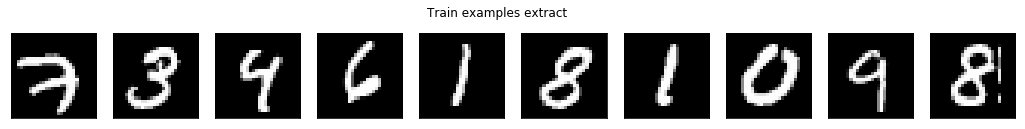

In [21]:
# remove stochasity
import random
random.seed("000")

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

def plot_images(images, title, imgsize):
    n = images.shape[0]
    n_cols = 10
    n_rows = ceil(n / n_cols)
    plt.figure(figsize=(1.8 * n_cols, 2 * n_rows))
    plt.suptitle(title)
    for i in range(n):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        plot_image(ax, images[i,:], imgsize)
        
def plot_image(ax, image, imgsize):
    plt.imshow(image.reshape(imgsize), cmap='Greys_r')
    plt.xticks(())
    plt.yticks(())

plot_images(mnist.train.images[:10,:], "Train examples extract", (28,28))
plt.show()

In [20]:
print("size of training: {}".format(mnist.train.images.shape))
print("size of test: {}".format(mnist.test.images.shape))
print("size of validation: {}".format(mnist.validation.images.shape))

size of training: (55000, 784)
size of test: (10000, 784)
size of validation: (5000, 784)


In [30]:
unique_train, counts_train = np.unique(np.argmax(mnist.train.labels, axis=1),
                                       return_counts=True)
print(np.asarray((unique_train, counts_train)).T)

[[   0 5444]
 [   1 6179]
 [   2 5470]
 [   3 5638]
 [   4 5307]
 [   5 4987]
 [   6 5417]
 [   7 5715]
 [   8 5389]
 [   9 5454]]


In [31]:
unique_test, counts_test = np.unique(np.argmax(mnist.test.labels, axis=1),
                                       return_counts=True)
print(np.asarray((unique_test, counts_test)).T)

[[   0  980]
 [   1 1135]
 [   2 1032]
 [   3 1010]
 [   4  982]
 [   5  892]
 [   6  958]
 [   7 1028]
 [   8  974]
 [   9 1009]]


In [32]:
unique_validation, counts_validation = np.unique(np.argmax(mnist.validation.labels, axis=1),
                                       return_counts=True)
print(np.asarray((unique_validation, counts_validation)).T)

[[  0 479]
 [  1 563]
 [  2 488]
 [  3 493]
 [  4 535]
 [  5 434]
 [  6 501]
 [  7 550]
 [  8 462]
 [  9 495]]


<BarContainer object of 10 artists>

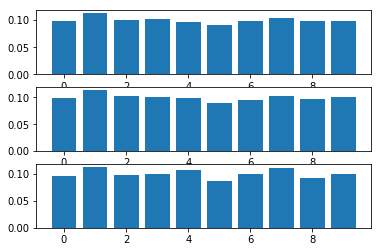

In [45]:
plt.subplot(3, 1, 1)
plt.bar(unique_train, counts_train/sum(counts_train))

plt.subplot(3, 1, 2)
plt.bar(unique_test, counts_test/sum(counts_test))

plt.subplot(3, 1, 3)
plt.bar(unique_validation, counts_validation/sum(counts_validation))